# Big-Data for Computational Finance - Assignment 1

## Introduction

### Project Objectives
The  objective of this project is to implement and solve the Markowitz portfolio optimization model using Python. This involves formulating the problem as a quadratic optimization task and exploring various constraints to analyze their impact on the efficient frontier.

### Tasks and Requirements
The project consists of the following tasks:

1. **Task 1: Solve the Original Problem**
   - Formulate and solve the Markowitz portfolio optimization problem with the standard constraints.
   - Plot the efficient frontier for different expected returns.

2. **Task 2: Modify the Investment Constraint**
   - Modify the total investment constraint to \(\mathbf{e}^T \mathbf{x} \leq 1\) and solve the optimization problem.
   - Compare the results with the original problem.

3. **Task 3: Change the Return Constraint**
   - Change the return constraint to \(\boldsymbol{\mu}^T \mathbf{x} \geq r\) and solve the optimization problem.
   - Analyze the impact of this modification on the efficient frontier.

4. **Task 4: Allow Short Selling**
   - Remove the non-negativity constraint (\(\mathbf{x} \geq \mathbf{0}\)) to allow short selling.
   - Solve the optimization problem and compare the results with previous tasks.

### Theoretical Foundation
The Markowitz model, also known as the mean-variance optimization model, aims to determine the optimal allocation of capital across a set of assets. The goal is to minimize the portfolio's risk (variance) for a given level of expected return. This optimization problem can be expressed mathematically as:

\[ 
\begin{align*}
\text{Minimize} & \quad \mathbf{x}^T \mathbf{C} \mathbf{x} \\
\text{Subject to} & \quad \boldsymbol{\mu}^T \mathbf{x} = r \\
& \quad \mathbf{e}^T \mathbf{x} = 1 \\
& \quad \mathbf{x} \geq \mathbf{0}
\end{align*}
\]

Where:
- \(\mathbf{x}\) is the vector of asset weights.
- \(\mathbf{C}\) is the covariance matrix of asset returns.
- \(\boldsymbol{\mu}\) is the vector of expected returns.
- \(r\) is the desired portfolio return.
- \(\mathbf{e}\) is a vector of ones ensuring the sum of weights is equal to 1.



# Importing Necessary Libraries

In [149]:
import numpy as np
import random 
from qpsolvers import solve_qp
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import solvers, matrix
from scipy.optimize import minimize

# Task no 1 (25%) 
### **part 1** 

In [198]:
import cvxpy as cp

# Define the given parameters (example)
n = 3  # Number of assets
mu = np.array([0.1, 0.2, 0.15])  # Expected returns
C = np.array([[0.005, -0.010, 0.004], [-0.010, 0.040, -0.002], [0.004, -0.002, 0.023]])  # Covariance matrix

# Define the vector e
e = np.ones(n)

# Define the range of r values
r_values = np.arange(2.0, 9.25, 0.25)

# Initialize lists to store sigma and mu values
sigma_values = []
mu_values = []

# Solve the optimization problem for each r
for r in r_values:
    # Define the optimization variable
    x = cp.Variable(n)

    # Define the objective function (minimize variance)
    objective = cp.Minimize(cp.quad_form(x, C))

    # Define the constraints
    constraints = [
        mu.T @ x == r,  # Expected return constraint
        e.T @ x == 1,   # Sum of fractions constraint
        x >= 0          # No short-selling constraint
    ]

    # Define the problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve()

  # Check if the problem was solved optimally
    if problem.status == cp.OPTIMAL:
        # Get the optimal x
        x_opt = x.value

        # Calculate sigma(x) and mu(x)
        sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
        mu_x = mu.T @ x_opt
    else:
        # If the problem was not solved optimally, set sigma_x and mu_x to np.nan
        sigma_x = np.nan
        mu_x = np.nan

    # Store the values
    sigma_values.append(sigma_x)
    mu_values.append(mu_x)


# Convert lists to numpy arrays for plotting
sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)
t1_p1 = sigma_values
t1_p2 = mu_values

# Plot the results


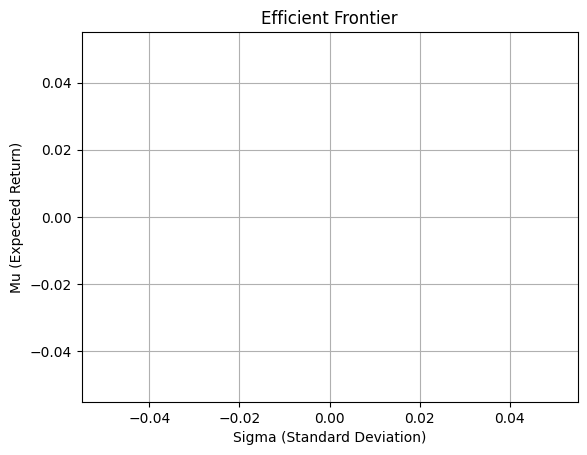

In [199]:
# Plot the results
#plt.figure(figsize=(10, 6))
plt.plot(t1_p1, t1_p2, marker='o')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

### part 2 

In [200]:
# Number of assets
n = 10

# Replace dig1 with the second-to-last digit of your registration number
# Replace dig2 with the last digit of your registration number
dig1 = 0  # example, should be replaced with actual value
dig2 = 0  # example, should be replaced with actual value
dummyrepetitions = 10 * dig1 + dig2

# Perform dummy repetitions
for _ in range(dummyrepetitions):
    dummy = random.uniform(0, 1)

# Generate the correlation matrix Corr
Corr = np.array([[0] * n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)

# Generate the standard deviations ssigma and expected returns mmu
ssigma = np.zeros((n, 1), dtype=float)
mmu = np.zeros((n, 1), dtype=float)
ssigma[0] = 2
mmu[0] = 3
for i in range(n - 1):
    ssigma[i + 1] = ssigma[i] + 2 * random.uniform(0, 1)
    mmu[i + 1] = mmu[i] + 1

# Generate the diagonal matrix ddiag
ddiag = np.zeros((n, n), dtype=float)
np.fill_diagonal(ddiag, ssigma.flatten())

# Calculate the covariance matrix C2 and the final matrix C
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5 * (C2 + C2.T)

# Convert mmu to a 1D array for easier use in the optimization
mu = mmu.flatten()

# Define the vector e
e = np.ones(n)

# Define the range of r values
r_values = np.arange(2.0, 9.25, 0.25)  # series of r increasing 0.25 from question

# Initialize lists to store sigma and mu values
sigma_values = []
mu_values = []

# Solve the optimization problem for each r
for r in r_values:
    # Define the optimization variable
    x = cp.Variable(n)

    # Define the objective function (minimize variance)
    objective = cp.Minimize(cp.quad_form(x, C))

    # Define the constraints
    constraints = [
        mu.T @ x == r,  # Expected return constraint
        e.T @ x == 1,   # Sum of fractions constraint
        x >= 0          # No short-selling constraint
    ]

    # Define the problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve()

    # Check if the problem was solved optimally
    if problem.status == cp.OPTIMAL:
        # Get the optimal x
        x_opt = x.value

        # Calculate sigma(x) and mu(x)
        sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
        mu_x = mu.T @ x_opt
    else:
        # If the problem was not solved optimally, set sigma_x and mu_x to np.nan
        sigma_x = np.nan
        mu_x = np.nan

    # Store the values
    sigma_values.append(sigma_x)
    mu_values.append(mu_x)

# Convert lists to numpy arrays for plotting
sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)
t1p2_p1 = sigma_values
t1p2_p2 = mu_values

## plot of part 2

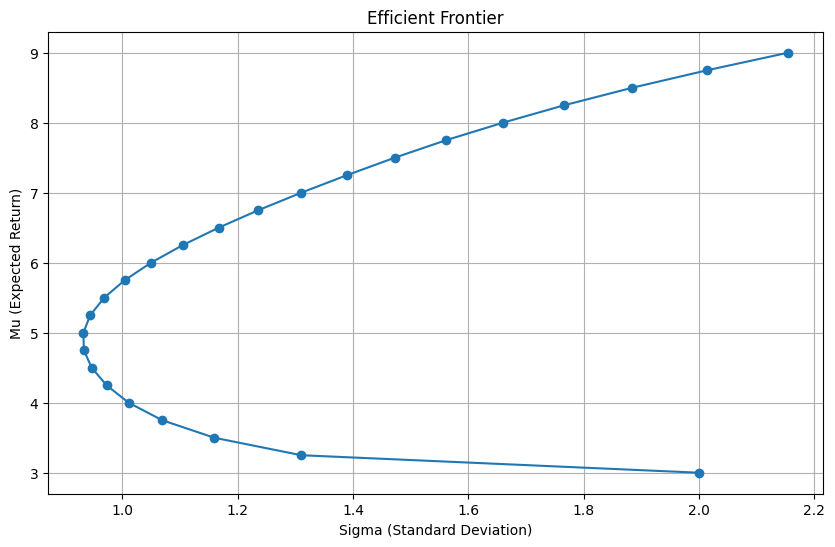

In [201]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t1p2_p1, t1p2_p2, marker='o')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

# # Task 2: Modify the Investment Constraint

In [204]:
# Number of assets
n = 10

# Replace dig1 with the second-to-last digit of your registration number
# Replace dig2 with the last digit of your registration number
dig1 = 0  # example, should be replaced with actual value
dig2 = 0  # example, should be replaced with actual value
dummyrepetitions = 10 * dig1 + dig2

# Perform dummy repetitions
for _ in range(dummyrepetitions):
    dummy = random.uniform(0, 1)

# Generate the correlation matrix Corr
Corr = np.array([[0] * n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)

# Generate the standard deviations ssigma and expected returns mmu
ssigma = np.zeros((n, 1), dtype=float)
mmu = np.zeros((n, 1), dtype=float)
ssigma[0] = 2
mmu[0] = 3
for i in range(n - 1):
    ssigma[i + 1] = ssigma[i] + 2 * random.uniform(0, 1)
    mmu[i + 1] = mmu[i] + 1

# Generate the diagonal matrix ddiag
ddiag = np.zeros((n, n), dtype=float)
np.fill_diagonal(ddiag, ssigma.flatten())

# Calculate the covariance matrix C2 and the final matrix C
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5 * (C2 + C2.T)

# Convert mmu to a 1D array for easier use in the optimization
mu = mmu.flatten()

# Define the vector e
e = np.ones(n)

# Define the range of r values
r_values = np.arange(2.0, 9.25, 0.25)  # series of r increasing 0.25 from question

# Initialize lists to store sigma and mu values
sigma_values = []
mu_values = []

# Solve the optimization problem for each r
for r in r_values:
    # Define the optimization variable
    x = cp.Variable(n)

    # Define the objective function (minimize variance)
    objective = cp.Minimize(cp.quad_form(x, C))

    # Define the constraints
    constraints = [
        mu.T @ x == r,  # Expected return constraint
        e.T @ x <= 1,   # Sum of fractions constraint allowing for less than full investment
        x >= 0          # No short-selling constraint
    ]

    # Define the problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve()

    # Check if the problem was solved optimally
    if problem.status == cp.OPTIMAL:
        # Get the optimal x
        x_opt = x.value

        # Calculate sigma(x) and mu(x)
        sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
        mu_x = mu.T @ x_opt
    else:
        # If the problem was not solved optimally, set sigma_x and mu_x to np.nan
        sigma_x = np.nan
        mu_x = np.nan

    # Store the values
    sigma_values.append(sigma_x)
    mu_values.append(mu_x)

# Convert lists to numpy arrays for plotting
sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)

t2_p1 = sigma_values
t2_p2 = mu_values

# plot of Task 2 

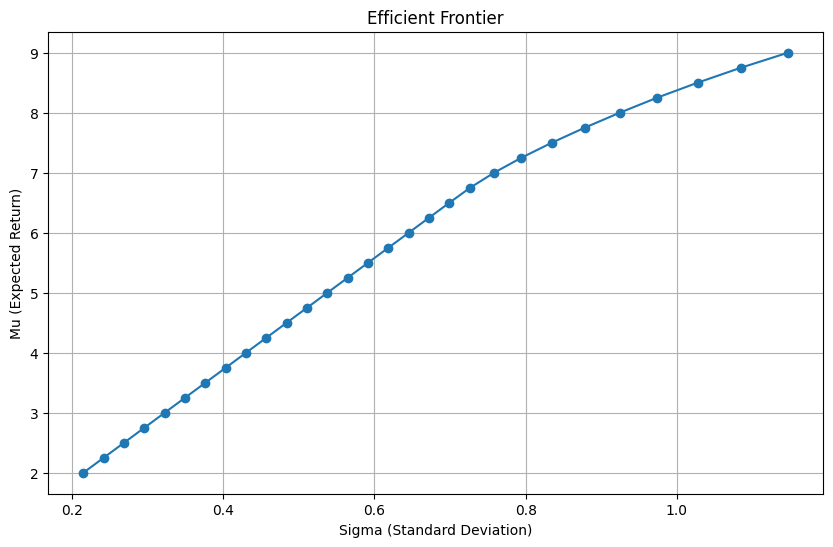

In [207]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t2_p1, t2_p2, marker='o')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

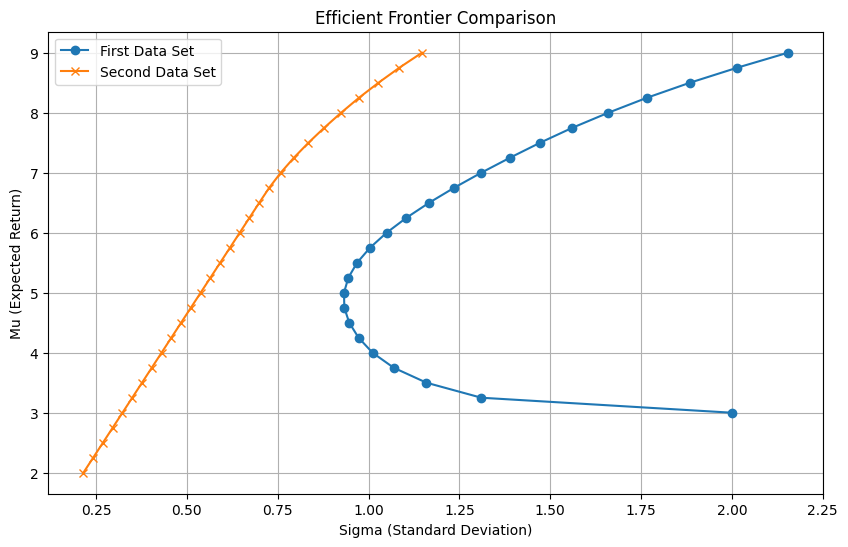

In [208]:
plt.figure(figsize=(10, 6))
plt.plot(t1p2_p1, t1p2_p2, marker='o', label='First Data Set')
plt.plot(t2_p1, t2_p2, marker='x', label='Second Data Set')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier Comparison')
plt.grid(True)
plt.legend()
plt.show()

# Task no 3

In [211]:
# Number of assets
n = 10

# Replace dig1 with the second-to-last digit of your registration number
# Replace dig2 with the last digit of your registration number
dig1 = 0  # example, should be replaced with actual value
dig2 = 0  # example, should be replaced with actual value
dummyrepetitions = 10 * dig1 + dig2

# Perform dummy repetitions
for _ in range(dummyrepetitions):
    dummy = random.uniform(0, 1)

# Generate the correlation matrix Corr
Corr = np.array([[0] * n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)

# Generate the standard deviations ssigma and expected returns mmu
ssigma = np.zeros((n, 1), dtype=float)
mmu = np.zeros((n, 1), dtype=float)
ssigma[0] = 2
mmu[0] = 3
for i in range(n - 1):
    ssigma[i + 1] = ssigma[i] + 2 * random.uniform(0, 1)
    mmu[i + 1] = mmu[i] + 1

# Generate the diagonal matrix ddiag
ddiag = np.zeros((n, n), dtype=float)
np.fill_diagonal(ddiag, ssigma.flatten())

# Calculate the covariance matrix C2 and the final matrix C
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5 * (C2 + C2.T)

# Convert mmu to a 1D array for easier use in the optimization
mu = mmu.flatten()

# Define the vector e
e = np.ones(n)

# Define the range of r values
r_values = np.arange(2.0, 9.25, 0.25)  # series of r increasing 0.25 from question

# Initialize lists to store sigma and mu values
sigma_values = []
mu_values = []

# Solve the optimization problem for each r
for r in r_values:
    # Define the optimization variable
    x = cp.Variable(n)

    # Define the objective function (minimize variance)
    objective = cp.Minimize(cp.quad_form(x, C))

    # Define the constraints
    constraints = [
        mu.T @ x >= r,  # Expected return constraint (at least r)
        e.T @ x == 1,   # Sum of fractions constraint
        x >= 0          # No short-selling constraint
    ]

    # Define the problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve()

    # Check if the problem was solved optimally
    if problem.status == cp.OPTIMAL:
        # Get the optimal x
        x_opt = x.value

        # Calculate sigma(x) and mu(x)
        sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
        mu_x = mu.T @ x_opt
    else:
        # If the problem was not solved optimally, set sigma_x and mu_x to np.nan
        sigma_x = np.nan
        mu_x = np.nan

    # Store the values
    sigma_values.append(sigma_x)
    mu_values.append(mu_x)

# Convert lists to numpy arrays for plotting
sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)

t3_p1 = sigma_values
t3_p2 = mu_values

# plot of task 3

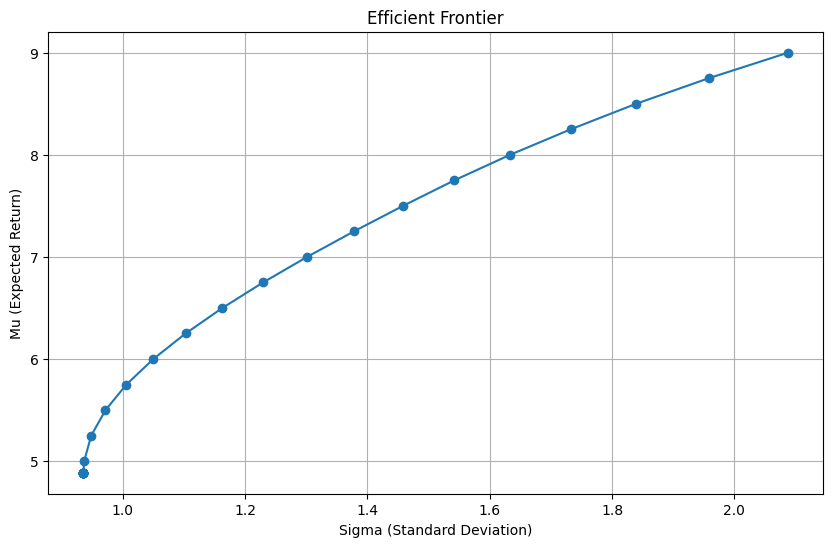

In [212]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t3_p1, t3_p2, marker='o')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

# compare plot 1 and plot 3

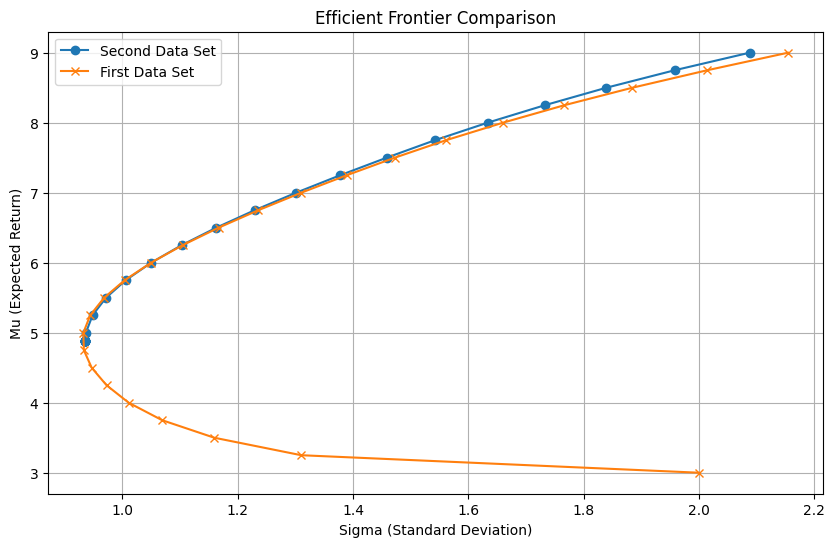

In [213]:
plt.figure(figsize=(10, 6))
plt.plot(t3_p1, t3_p2, marker='o', label='Second Data Set')
plt.plot(t1p2_p1, t1p2_p2, marker='x', label='First Data Set')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier Comparison')
plt.grid(True)
plt.legend()
plt.show()

# Task no 4

In [214]:
# Number of assets
n = 10

# Replace dig1 with the second-to-last digit of your registration number
# Replace dig2 with the last digit of your registration number
dig1 = 0  # example, should be replaced with actual value
dig2 = 0  # example, should be replaced with actual value
dummyrepetitions = 10 * dig1 + dig2

# Perform dummy repetitions
for _ in range(dummyrepetitions):
    dummy = random.uniform(0, 1)

# Generate the correlation matrix Corr
Corr = np.array([[0] * n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)

# Generate the standard deviations ssigma and expected returns mmu
ssigma = np.zeros((n, 1), dtype=float)
mmu = np.zeros((n, 1), dtype=float)
ssigma[0] = 2
mmu[0] = 3
for i in range(n - 1):
    ssigma[i + 1] = ssigma[i] + 2 * random.uniform(0, 1)
    mmu[i + 1] = mmu[i] + 1

# Generate the diagonal matrix ddiag
ddiag = np.zeros((n, n), dtype=float)
np.fill_diagonal(ddiag, ssigma.flatten())

# Calculate the covariance matrix C2 and the final matrix C
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5 * (C2 + C2.T)

# Convert mmu to a 1D array for easier use in the optimization
mu = mmu.flatten()

# Define the vector e
e = np.ones(n)

# Define the range of r values
r_values = np.arange(2.0, 9.25, 0.25)  # series of r increasing 0.25 from question

# Initialize lists to store sigma and mu values
sigma_values = []
mu_values = []

# Solve the optimization problem for each r
for r in r_values:
    # Define the optimization variable
    x = cp.Variable(n)

    # Define the objective function (minimize variance)
    objective = cp.Minimize(cp.quad_form(x, C))

    # Define the constraints
    constraints = [
        mu.T @ x == r,  # Expected return constraint
        e.T @ x == 1    # Sum of fractions constraint
        # Removed x >= 0 to allow short-selling
    ]

    # Define the problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve()

    # Check if the problem was solved optimally
    if problem.status == cp.OPTIMAL:
        # Get the optimal x
        x_opt = x.value

        # Calculate sigma(x) and mu(x)
        sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
        mu_x = mu.T @ x_opt
    else:
        # If the problem was not solved optimally, set sigma_x and mu_x to np.nan
        sigma_x = np.nan
        mu_x = np.nan

    # Store the values
    sigma_values.append(sigma_x)
    mu_values.append(mu_x)

# Convert lists to numpy arrays for plotting
sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)

t4_p1 = sigma_values
t4_p2 = mu_values

# plot of task 4 

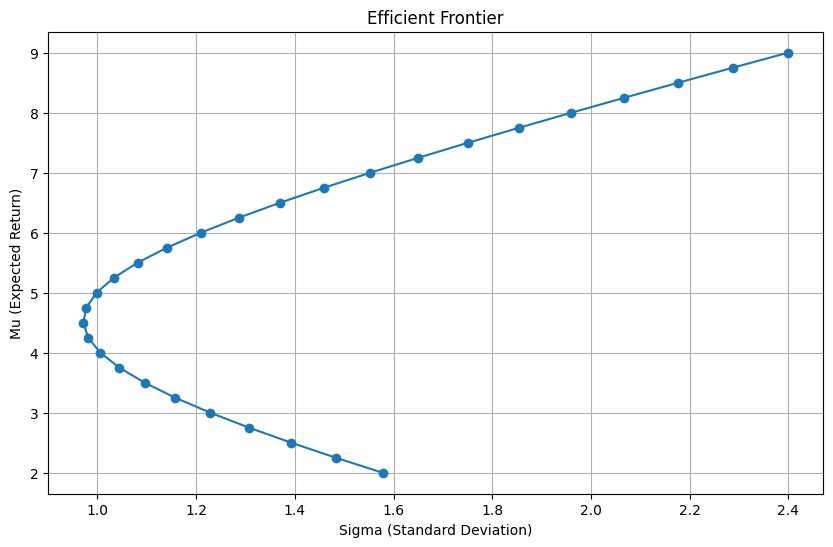

In [215]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t4_p1, t4_p2, marker='o')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

 # compare plot 1 and plot 4

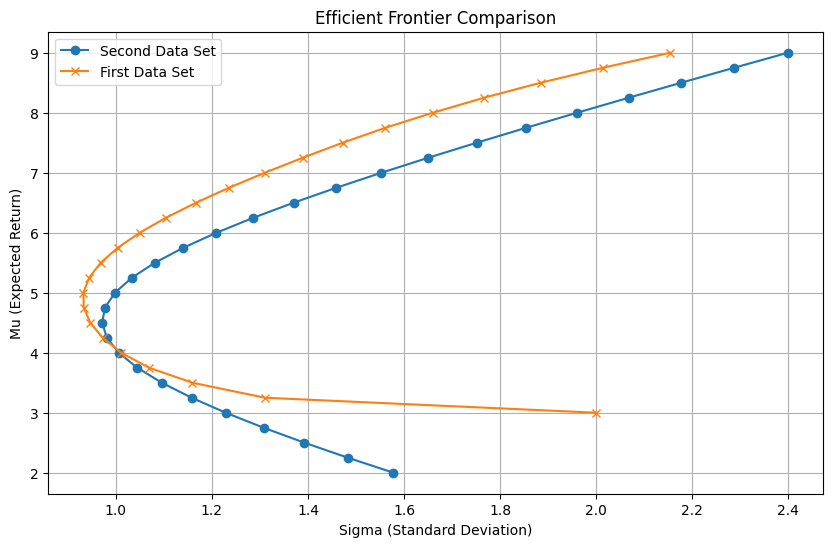

In [216]:
plt.figure(figsize=(10, 6))
plt.plot(t4_p1, t4_p2, marker='o', label='Second Data Set')
plt.plot(t1p2_p1, t1p2_p2, marker='x', label='First Data Set')
plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier Comparison')
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------------------------

# optimization

In [152]:
# List of target returns
target_returns = np.arange(2.0, 9.25, 0.25)

sigma_values = []
mu_values = []

for r in target_returns:
    # Define the constraints
    A = np.vstack([mu, np.ones(n)])
    b = np.array([r, 1])

    # Solve the quadratic programming problem
    x = solve_qp(P=C, q=np.zeros(n), G=-np.eye(n), h=np.zeros(n), A=A, b=b)



    # Calculate sigma and mu
    sigma = np.sqrt(x.T @ C @ x)
    mu_value = mu.T @ x

    sigma_values.append(sigma)
    mu_values.append(mu_value)

# sigma_values and mu_values contain the results

NoSolverSelected: Set the `solver` keyword argument to one of the available solvers in []

# PLOTS 

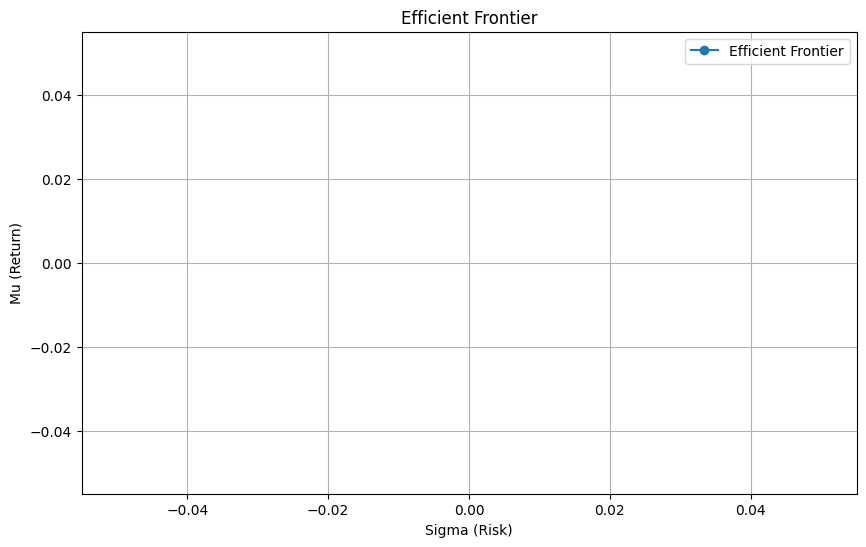

In [126]:
# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, mu_values, 'o-', label='Efficient Frontier')
plt.xlabel('Sigma (Risk)')
plt.ylabel('Mu (Return)')
plt.title('Efficient Frontier')
plt.legend()
plt.grid(True)
plt.show()

# Task 3: Change the Return Constraint


# TASK NO 1 ROUGH

In [127]:

# Define the number of assets
n = 5

# Define the expected returns and covariance matrix
mu = np.array([3.0, 4.0, 5.0, 6.0, 7.0])
C = np.array([
    [0.001, 0.005, 0.002, 0.003, 0.004],
    [0.005, 0.010, 0.007, 0.008, 0.009],
    [0.002, 0.007, 0.012, 0.011, 0.013],
    [0.003, 0.008, 0.011, 0.015, 0.016],
    [0.004, 0.009, 0.013, 0.016, 0.020]
])

# Define the right-hand side values for r
r_values = np.arange(2.0, 9.1, 0.25)

# Initialize vectors to store the results
sigma_values = np.zeros(len(r_values))
mu_values = np.zeros(len(r_values))

# Solve the Markowitz portfolio optimization problem for each r value
for i, r in enumerate(r_values):
    # Define the quadratic program
    P = C
    q = -mu
    G = np.array([[-1.0] * n, [1.0] * n])
    h = np.array([r, 1.0])
    A = np.array([[1.0] * n])
    b = np.array([1.0])

    # Solve the quadratic program using qpsolvers
    x = qpsolvers.solve_qp(P, q, G, h, A, b)

    # Calculate the portfolio variance and expected return
    sigma = np.sqrt(np.dot(x.T, np.dot(C, x)))
    mu_portfolio = np.dot(mu, x)

    # Store the results
    sigma_values[i] = sigma
    mu_values[i] = mu_portfolio

# Plot the results
plt.plot(sigma_values, mu_values)
plt.xlabel('Standard Deviation (σ)')
plt.ylabel('Expected Return (μ)')
plt.title('Efficient Frontier')
plt.show()

NoSolverSelected: Set the `solver` keyword argument to one of the available solvers in []

In [128]:
np.zeros(len(r_values))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [129]:
r_values = np.arange(2.0, 9.1, 0.25)
n=5
for i, r in enumerate(r_values):
    # Define the quadratic program
    P = C
    q = -mu
    G = np.array([[-1.0] * n, [1.0] * n])
    h = np.array([r, 1.0])
    A = np.array([[1.0] * n])
    b = np.array([1.0])
# Convert numpy arrays to cvxopt matrices
P = matrix(P)
q = matrix(q)
G = matrix(G)
h = matrix(h)
A = matrix(A)
b = matrix(b)

# Solve QP problem with cvxopt
sol = solvers.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -9.4825e+02 -9.5825e+02  2e+01  2e-01  7e-14
 1: -9.4825e+02 -9.4843e+02  3e-01  2e-03  6e-16
 2: -9.4825e+02 -9.4825e+02  3e-03  2e-05  3e-16
 3: -9.4825e+02 -9.4825e+02  3e-05  2e-07  0e+00
 4: -9.4825e+02 -9.4825e+02  3e-07  2e-09  3e-16
Optimal solution found.


C:\Users\muneeb ur rehman\AppData\Local\Temp\ipykernel_14544\197051110.py:36: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(x @ C @ x)


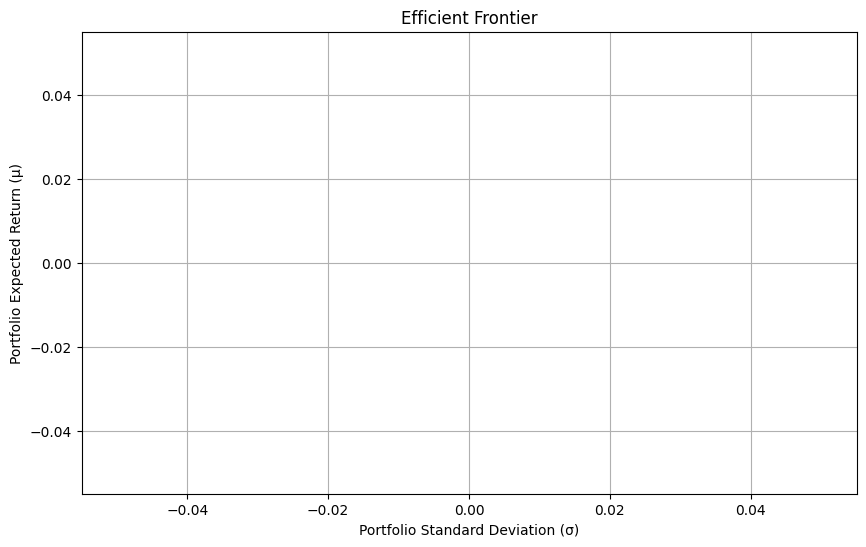

In [134]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.optimize import minimize

n = 10
dig1 = 7  # Second-to-last digit of the registration number
dig2 = 8  # Last digit of the registration number
dummyrepetitions = 10 * dig1 + dig2

# Dummy random number generation
for _ in range(dummyrepetitions):
    dummy = random.uniform(0, 1)

# Generate the correlation matrix
Corr = np.array([[-1**abs(i-j)/(abs(i-j)+1) for j in range(n)] for i in range(n)])

# Initialize ssigma and mmu
ssigma = np.zeros((n, 1))
mmu = np.zeros((n, 1))
ssigma[0] = 2
mmu[0] = 3

# Generate ssigma and mmu
for i in range(1, n):
    ssigma[i] = ssigma[i-1] + 2 * random.uniform(0, 1)
    mmu[i] = mmu[i-1] + 1

# Generate the covariance matrix C
ddiag = np.diag(ssigma.flatten())
C2 = ddiag @ Corr @ ddiag
C = 0.5 * (C2 + C2.T)

# Function to compute the portfolio variance and return
def portfolio_variance(x, C):
    return np.sqrt(x @ C @ x)

def portfolio_return(x, mmu):
    return mmu.T @ x

# Constraints for optimization
def constraint_eq(x):
    return np.sum(x) - 1

def constraint_return(x, target_return, mmu):
    return portfolio_return(x, mmu) - target_return

# Range of target returns
target_returns = np.arange(2.00, 9.25, 0.25)
portfolio_variances = []
portfolio_returns = []

# Optimization
for r in target_returns:
    constraints = [{'type': 'eq', 'fun': constraint_eq},
                   {'type': 'eq', 'fun': constraint_return, 'args': (r, mmu)}]
    bounds = [(0, 1) for _ in range(n)]
    result = minimize(portfolio_variance, x0=np.ones(n)/n, args=(C,), bounds=bounds, constraints=constraints)
    
    if result.success:
        x_opt = result.x
        portfolio_variances.append(portfolio_variance(x_opt, C))
        portfolio_returns.append(portfolio_return(x_opt, mmu))
    else:
        portfolio_variances.append(np.nan)
        portfolio_returns.append(np.nan)

# Convert to numpy arrays for plotting


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(portfolio_variances, portfolio_returns, marker='o')
plt.xlabel('Portfolio Standard Deviation (σ)')
plt.ylabel('Portfolio Expected Return (μ)')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


In [164]:
import cvxpy as cp
# Define the given parameters
n = 3  # Number of assets
mu = np.array([0.1, 0.2, 0.15])  # Expected returns
C = np.array([[0.10, -0.51, 0.04], [-0.010, 0.040, -0.002], [0.004, -0.002, 0.023]])  # Covariance matrix

# Define the vector e
e = np.ones(n)

# Define the range of r values
r_values = np.arange(2.0, 9.25, 0.25)  # series of r increasing 0.25 from question

# Initialize lists to store sigma and mu values
sigma_values = []
mu_values = []

# Solve the optimization problem for each r
for r in r_values:
    # Define the optimization variable
    x = cp.Variable(n)

    # Define the objective function (minimize variance)
    objective = cp.Minimize(cp.quad_form(x, C))

    # Define the constraints
    constraints = [
        mu.T @ x == r,  # Expected return constraint
        e.T @ x == 1,   # Sum of fractions constraint
        x >= 0          # No short-selling constraint
    ]

    # Define the problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve()

    # Check if the problem was solved optimally
    if problem.status == cp.OPTIMAL:
        # Get the optimal x
        x_opt = x.value

        # Calculate sigma(x) and mu(x)
        sigma_x = np.sqrt(x_opt.T @ C @ x_opt)
        mu_x = mu.T @ x_opt
    else:
        # If the problem was not solved optimally, set sigma_x and mu_x to np.nan
        sigma_x = np.nan
        mu_x = np.nan

    # Store the values
    sigma_values.append(sigma_x)
    mu_values.append(mu_x)

# Convert lists to numpy arrays for plotting
sigma_values = np.array(sigma_values)
mu_values = np.array(mu_values)

print(sigma_values)
print(mu_values)

ValueError: Quadratic form matrices must be symmetric/Hermitian.

In [157]:
e

array([1., 1., 1.])

In [159]:
r_values

array([2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 ,
       4.75, 5.  , 5.25, 5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25,
       7.5 , 7.75, 8.  , 8.25, 8.5 , 8.75, 9.  ])

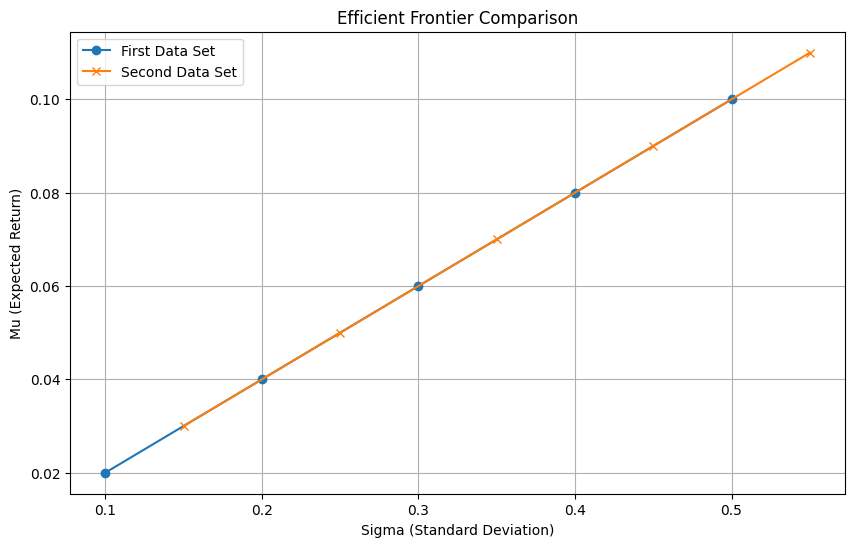

In [209]:
# Example data for the first plot
sigma_values_1 = [0.1, 0.2, 0.3, 0.4, 0.5]  # Replace with your actual data
mu_values_1 = [0.02, 0.04, 0.06, 0.08, 0.10]  # Replace with your actual data

# Example data for the second plot
sigma_values_2 = [0.15, 0.25, 0.35, 0.45, 0.55]  # Replace with your actual data
mu_values_2 = [0.03, 0.05, 0.07, 0.09, 0.11]  # Replace with your actual data

# Plot the results
plt.figure(figsize=(10, 6))

# First data set
plt.plot(sigma_values_1, mu_values_1, marker='o', label='First Data Set')

# Second data set
plt.plot(sigma_values_2, mu_values_2, marker='x', label='Second Data Set')

plt.xlabel('Sigma (Standard Deviation)')
plt.ylabel('Mu (Expected Return)')
plt.title('Efficient Frontier Comparison')
plt.grid(True)
plt.legend()
plt.show()